DATA LOADING AND SHOWING IMAGE

Loading MNIST dataset...
MNIST dataset loaded.


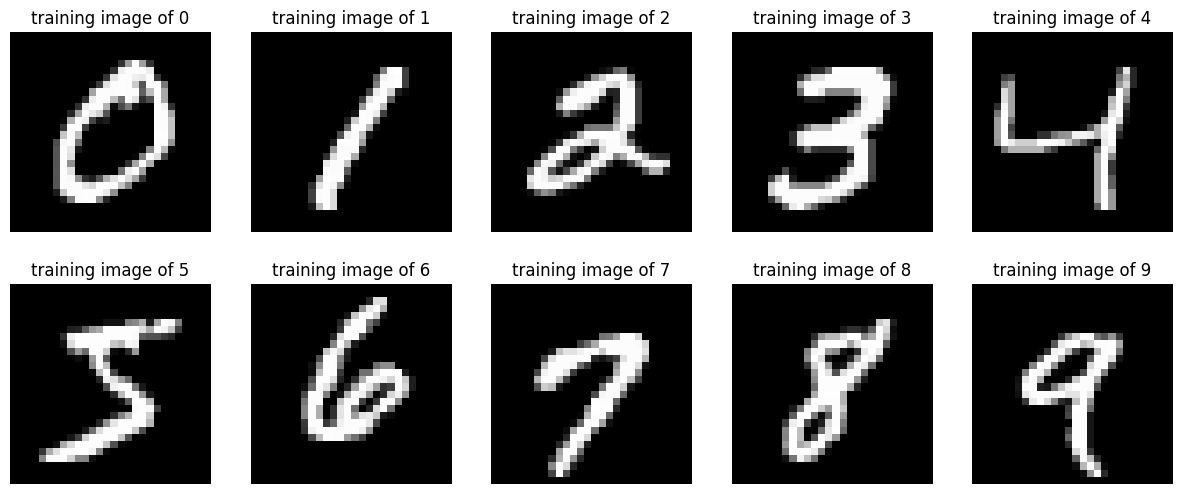

In [6]:
import os
import struct
from array import array
import numpy as np
import matplotlib.pyplot as plt
import random

class MnistDataloader:
    def __init__(self, training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError(f'Magic number mismatch, expected 2049, got {magic}')
            labels = np.frombuffer(file.read(), dtype=np.uint8)

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError(f'Magic number mismatch, expected 2051, got {magic}')
            images = np.frombuffer(file.read(), dtype=np.uint8).reshape(size, rows, cols)

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train), (x_test, y_test)

# Set file paths relative to the current working directory
working_dir = os.getcwd()
training_images_filepath = os.path.join(working_dir, 'train-images.idx3-ubyte')
training_labels_filepath = os.path.join(working_dir, 'train-labels.idx1-ubyte')
test_images_filepath = os.path.join(working_dir, 't10k-images.idx3-ubyte')
test_labels_filepath = os.path.join(working_dir, 't10k-labels.idx1-ubyte')

# Load MNIST dataset
print('Loading MNIST dataset...')
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
print('MNIST dataset loaded.')

# Show example images
def show_images(images, title_texts, cols=5):
    rows = len(images) // cols + (len(images) % cols != 0)
    plt.figure(figsize=(15, 3 * rows))
    for i, (image, title) in enumerate(zip(images, title_texts)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(title, fontsize=12)
        plt.axis('off')
    plt.show()

# Function to get one image per class
def get_one_image_per_class(images, labels):
    class_dict = {i: None for i in range(10)}  # Dictionary to store one image per class
    filled_classes = set()

    for image, label in zip(images, labels):
        if class_dict[label] is None:
            class_dict[label] = image
            filled_classes.add(label)
        if len(filled_classes) == 10:
            break

    return class_dict

# Get one image per class from the training set
class_images_train = get_one_image_per_class(x_train, y_train)
train_images, train_titles = zip(*[(img, f'training image of {i}') for i, img in class_images_train.items()])


# Show images from training set
show_images(train_images, train_titles, cols=5)




TRAINING AND VALIDATION SETS

In [8]:
from sklearn.model_selection import train_test_split

# Split the training data into 80% training and 20% validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display the sizes of the resulting datasets
print(f'Training set:   {len(x_train)} images')
print(f'Validation set: {len(x_valid)} images')



Training set:   48000 images
Validation set: 12000 images
